In [34]:
import pandas as pd
import numpy as np

In [63]:
import matplotlib.pyplot as plt

In [35]:
import plotly.plotly as py
import plotly.graph_objs as go

In [42]:
plotly.tools.set_credentials_file(username='kevisin', api_key='vjxWTZvaiKhMuleJdB21')

In [31]:
train = pd.read_csv('data/spooky/train.csv')

In [32]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


# EDA

In [201]:
train.shape

(19579, 3)

In [43]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kevisin/0 or inside your plot.ly account where it is named 'basic-bar'


In [49]:
train['text'].head()

0    This process, however, afforded me no means of...
1    It never once occurred to me that the fumbling...
2    In his left hand was a gold snuff box, from wh...
3    How lovely is spring As we looked from Windsor...
4    Finding nothing else, not even gold, the Super...
Name: text, dtype: object

In [51]:
train['text'].str.split(expand=True).unstack().value_counts()

the                33296
of                 20851
and                17059
to                 12615
I                  10382
a                  10359
in                  8787
was                 6440
that                5988
my                  5037
had                 4324
with                4207
his                 3802
as                  3528
he                  3422
it                  3247
for                 3227
which               3203
not                 3048
at                  2925
from                2758
by                  2725
is                  2533
but                 2521
on                  2285
be                  2268
The                 2121
were                2118
have                2089
me                  2015
                   ...  
do:                    1
reverend               1
stain                  1
ten.                   1
contained,             1
pull,                  1
revolv'd,              1
identifiable           1
Slader                 1


In [44]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kevisin/0 or inside your plot.ly account where it is named 'basic-bar'


In [60]:
eap = train[train['author'] == 'EAP']['text'].values
hpl = train[train['author'] == 'HPL']['text'].values
mws = train[train['author'] == 'MWS']['text'].values

In [104]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

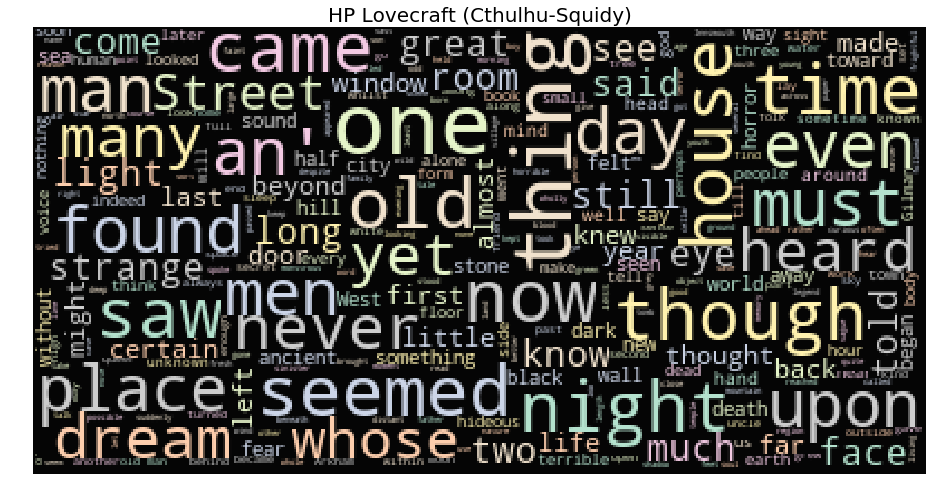

In [84]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(hpl))
plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

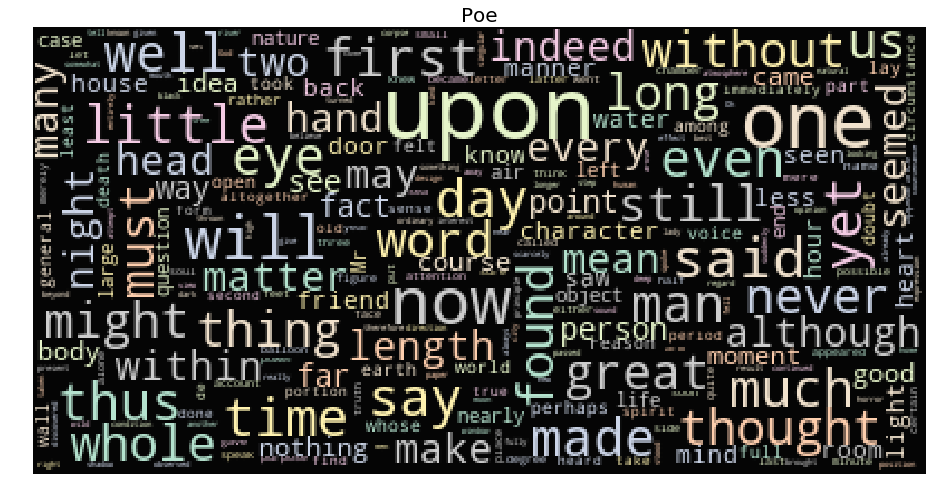

In [70]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(eap))
plt.title("Poe", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

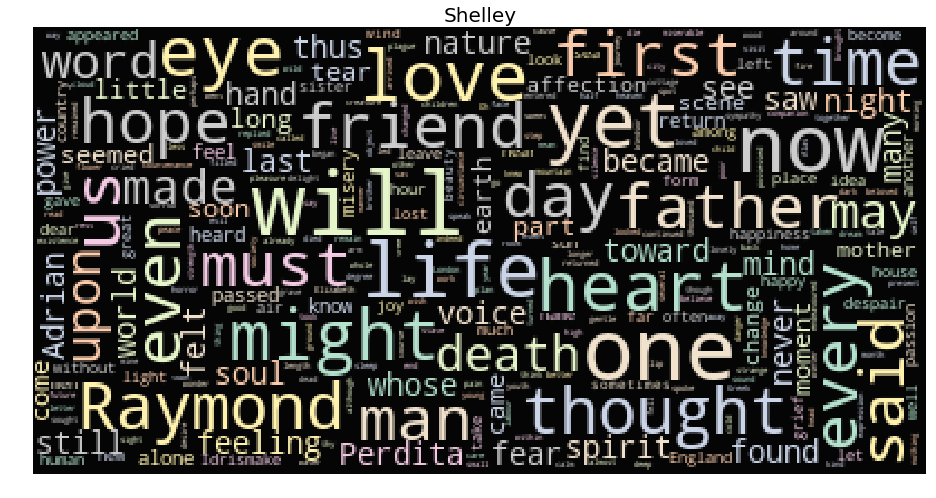

In [71]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(mws))
plt.title("Shelley", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

In [94]:
from os import path, getcwd
from PIL import Image

In [95]:
d = getcwd()

In [116]:
mask = np.array(Image.open(path.join(d, "eap.png")))

(-0.5, 639.5, 390.5, -0.5)

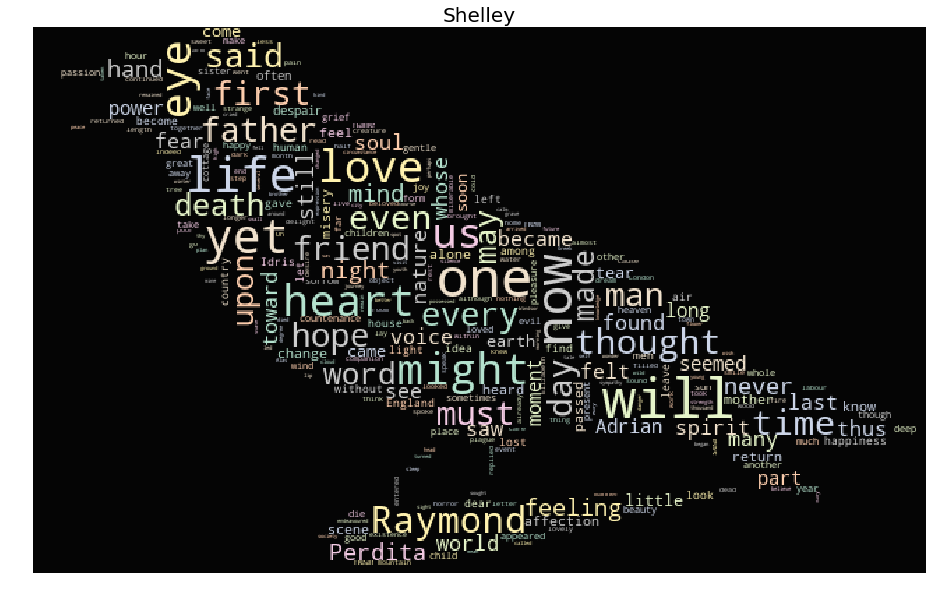

In [111]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               mask=mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(mws))
plt.title("Shelley", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

# Vectorize with CountVectorizer

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
sentence = ["I love to eat Burgers", 
            "I love to eat Fries"]

In [75]:
vectorizer = CountVectorizer(min_df=0)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [77]:
sentence_transform = vectorizer.fit_transform(sentence)
sentence_transform

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [78]:
print("The features are:\n {}".format(vectorizer.get_feature_names()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 ['burgers', 'eat', 'fries', 'love', 'to']

The vectorized array looks like:
 [[1 1 0 1 1]
 [0 1 1 1 1]]


In [118]:
import nltk

In [119]:
lemm = nltk.WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [126]:
# Storing the entire training text in a list
text = list(train['text'].values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [127]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kevisin/0 or inside your plot.ly account where it is named 'basic-bar'


In [123]:
# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kevisin/0 or inside your plot.ly account where it is named 'basic-bar'


# Vectorize with TFIDF?

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [197]:
lemm = nltk.WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [ ]:
# Storing the entire training text in a list
text = list(train['text'].values)
# Calling our overwritten Count vectorizer
tf_vectorizer = TfidfVectorizer(max_df=0.95, 
                                min_df=2,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(text)

# LDA Topic Modeling

In [82]:
# function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [124]:
from sklearn.decomposition import LatentDirichletAllocation

In [125]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [129]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=11, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [130]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:mean night fact young return great human looking wonder countenance difficulty greater wife finally set possessed regard struck perceived act society law health key fearful mr exceedingly evidence carried home write lady various recall accident force poet neck conduct investigation

Topic #1:death love raymond hope heart word child went time good man ground evil long misery replied filled passion bed till happiness memory heavy region year escape spirit grief visit doe story beauty die plague making influence thou letter appeared power

Topic #2:left let hand said took say little length body air secret gave right having great arm thousand character minute foot true self gentleman pleasure box clock discovered point sought pain nearly case best mere course manner balloon fear head going

Topic #3:called sense table suddenly sympathy machine sens unusual labour thrown mist solution suppose specie movement whispered urged frequent wine hour appears ring tu

In [131]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [142]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

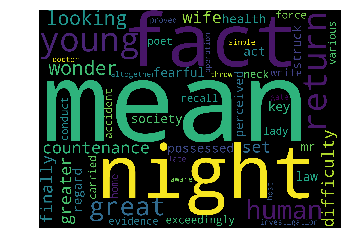

In [144]:
# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

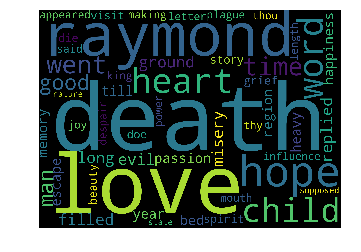

In [145]:
# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

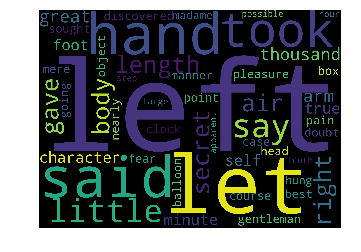

In [146]:
# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

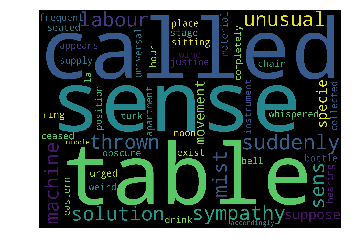

In [150]:
# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# NMF Topic Modeling

In [187]:
from sklearn.decomposition import NMF

In [189]:
nmf_model = NMF(n_components=11, max_iter=5,
                                random_state = 0)

In [190]:
nmf_model.fit(tf)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=5,
  n_components=11, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [191]:
n_top_words = 40
print("\nTopics in NMF model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(nmf_model, tf_feature_names, n_top_words)


Topics in NMF model: 

Topic #0:great word earth mind saw world thought felt deep love sea heard beauty evil spirit feeling scene shall light away good lovely god came multitude far form wisdom appeared wind oh nature voice near diotima moon human men lip say

Topic #1:time long hour come year thousand space short thought friend place matter way say make moment period new soon mean fear shall certain body foot room lost point length far line having second spent manner course memory idea grief person

Topic #2:man old god young farewell mr nature seen woman face power dark work good terrible human small animal tell city believe bearded way say sir person business water air sound long wonder set blind form general came high book dr

Topic #3:day night hour came passed long dream new far away sleep thousand month sun morning men mr late room having city went father work period week hill body house told year dark following home let raymond grew early place thought

Topic #4:thing say men 

In [193]:
first_topic = nmf_model.components_[0]
second_topic = nmf_model.components_[1]
third_topic = nmf_model.components_[2]
fourth_topic = nmf_model.components_[3]

In [194]:
first_topic_words_nmf = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words_nmf = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words_nmf = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words_nmf = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

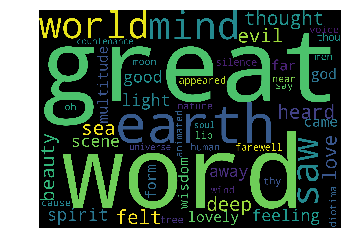

In [195]:
# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words_nmf))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

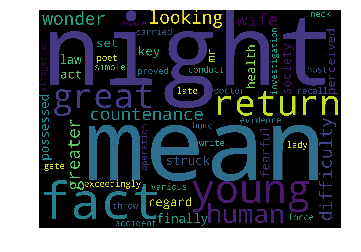

In [196]:
# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

In [200]:
tf.shape

(19579, 13781)

### Alice wordcloud

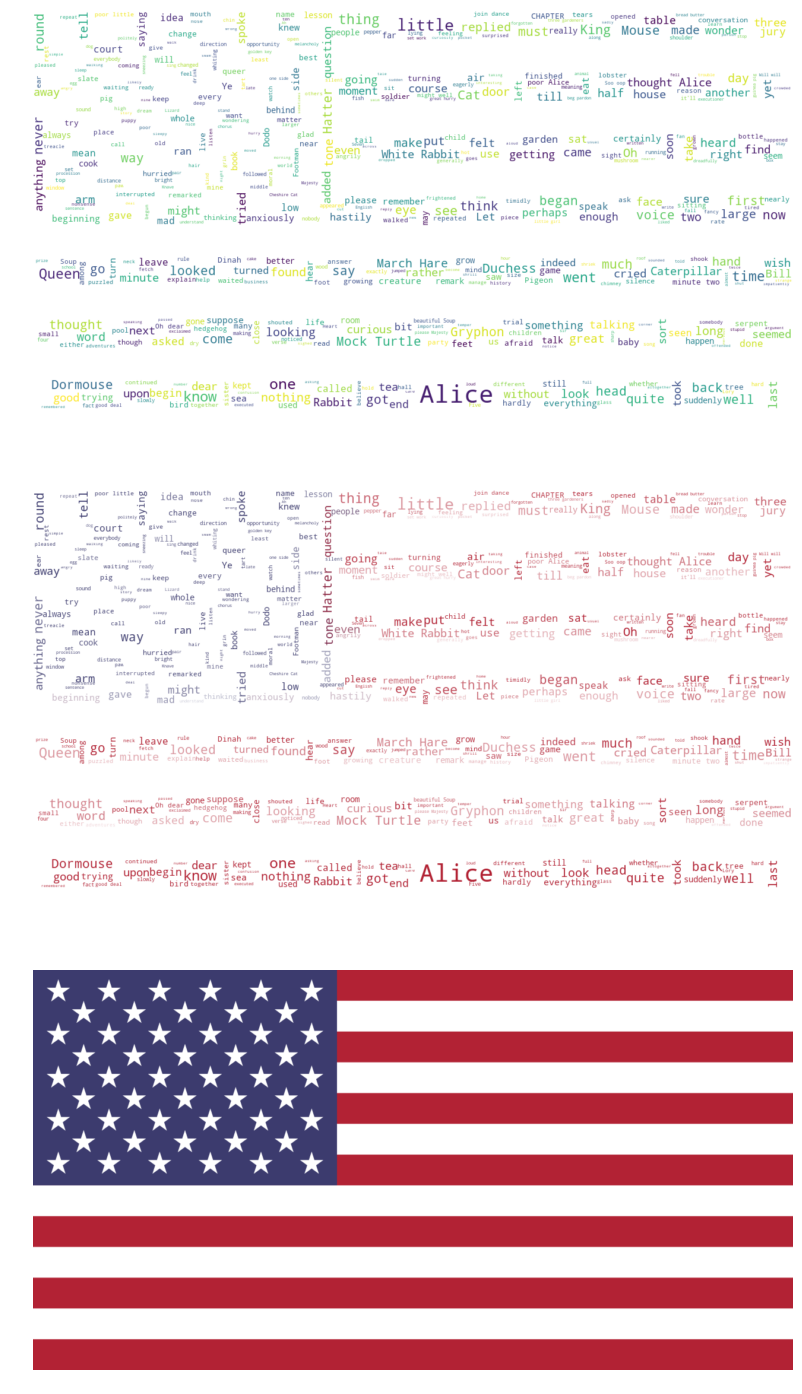

In [186]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, '/home/kevcon/nltk_data/corpora/gutenberg/carroll-alice.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "usa.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=500, mask=alice_coloring,
               stopwords=stopwords, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(15, 25))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()